In [28]:
import random
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score
import seaborn as sns

In [34]:
plt.rcParams.update({'font.size': 16})

In [57]:
# load labels for dataset
path_lbl = 'results/all_labels.npy'
all_labels = np.load(path_lbl)

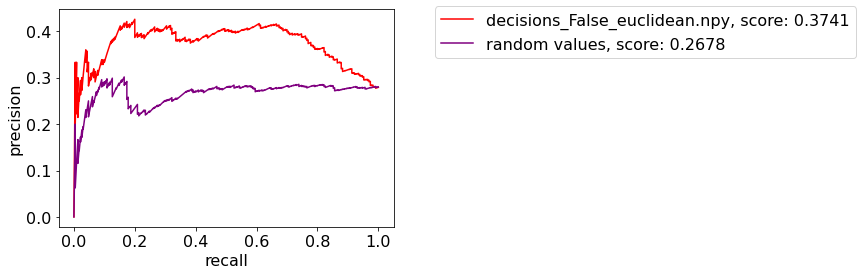

In [59]:
dir_ = 'results/test' # path to folder with .npy files containing decision values for evaluation experiments
k = 1
for p in os.listdir(dir_):
    decisions = np.load(dir_+'/'+p)
    pr, rec, thr = precision_recall_curve(all_labels, decisions)
    stat = average_precision_score(all_labels, decisions)
    if 'l1' in p:
        linestyle = '-'
    elif 'l2' in p:
        linestyle = '--'
    elif 'none' in p:
        linestyle = '-.'
    if 'euclidean' in p:
        color = 'r'
    elif 'cosine' in p:
        color = 'b'
    elif 'mahalanobis' in p:
        color='g'
    elif 'manhattan' in p:
        color='y'
    plt.ylabel('precision')
    plt.xlabel('recall')
    plt.plot(rec[:-k], pr[:-k], color=color, linestyle=linestyle,  label=f"{p}, score: {round(stat,4)}")
    xx = [random.random() for _ in range(len(all_labels))]
    pr, rec, thr = precision_recall_curve(all_labels, xx)
    stat = average_precision_score(all_labels, xx)
    plt.plot(rec[:-k], pr[:-k], color='purple', label=f"random values, score: {round(stat,4)}");
    plt.legend(bbox_to_anchor=(1.1, 1.05));